In [1]:
import json
import pandas as pd


In [2]:
datos_telecomx = pd.read_json('TelecomX_Data.json')
datos_telecomx.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df_normalizado = pd.concat(
    [
        # columnas simples (las que NO son diccionarios)
        datos_telecomx.drop(columns=["customer", "phone", "internet", "account"]),

        # desanidar cada bloque
        datos_telecomx["customer"].apply(pd.Series).add_prefix("customer_"),
        datos_telecomx["phone"].apply(pd.Series).add_prefix("phone_"),
        datos_telecomx["internet"].apply(pd.Series).add_prefix("internet_"),
        datos_telecomx["account"].apply(pd.Series).add_prefix("account_"),
    ],
    axis=1
)

df_normalizado.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [4]:
import pandas as pd

# Partimos del DataFrame original leído con read_json
df = pd.concat(
    [
        datos_telecomx.drop(columns=["customer", "phone", "internet", "account"]),
        datos_telecomx["customer"].apply(pd.Series).add_prefix("customer_"),
        datos_telecomx["phone"].apply(pd.Series).add_prefix("phone_"),
        datos_telecomx["internet"].apply(pd.Series).add_prefix("internet_"),
        datos_telecomx["account"].apply(pd.Series).add_prefix("account_"),
    ],
    axis=1
)

df.head()



,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [5]:
# Desanidar account_Charges
charges_df = df["account_Charges"].apply(pd.Series)

# Renombrar columnas
charges_df = charges_df.rename(columns={
    "Monthly": "Charges_Monthly",
    "Total": "Charges_Total"
})

# Eliminar la columna original
df = df.drop(columns=["account_Charges"])

# Unir al dataframe principal
df = pd.concat([df, charges_df], axis=1)

df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
# Diccionario de traducción de columnas
columnas_es = {
    "customerID": "id_cliente",
    "customer_gender": "genero",
    "customer_SeniorCitizen": "adulto_mayor",
    "customer_Partner": "tiene_pareja",
    "customer_Dependents": "tiene_dependientes",
    "customer_tenure": "antiguedad_meses",

    "phone_PhoneService": "servicio_telefono",
    "phone_MultipleLines": "lineas_multiples",

    "internet_InternetService": "servicio_internet",
    "internet_OnlineSecurity": "seguridad_online",
    "internet_OnlineBackup": "respaldo_online",
    "internet_DeviceProtection": "proteccion_dispositivo",
    "internet_TechSupport": "soporte_tecnico",
    "internet_StreamingTV": "streaming_tv",
    "internet_StreamingMovies": "streaming_peliculas",

    "account_Contract": "tipo_contrato",
    "account_PaperlessBilling": "factura_electronica",
    "account_PaymentMethod": "metodo_pago",

    "Charges_Monthly": "cargo_mensual",
    "Charges_Total": "cargo_total"
}

# Renombrar columnas (las que no estén en el diccionario se quedan igual)
df = df.rename(columns=columnas_es)

df.head()


,id_cliente,Churn,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df["genero"] = df["genero"].replace({"Female": "Femenino", "Male": "Masculino"})
df["servicio_internet"] = df["servicio_internet"].replace({"Fiber optic": "Fibra Óptica"})
df["tipo_contrato"] = df["tipo_contrato"].replace({"Month-to-month": "Mensual", "One year": "Anual", "Two year": "Dos años"})
df["metodo_pago"] = df["metodo_pago"].replace({"Electronic check": "Cheque electrónico", "Mailed check": "Cheque por correo"})

df.head()

,id_cliente,Churn,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,Anual,Yes,Cheque por correo,65.6,593.3
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Mensual,No,Cheque por correo,59.9,542.4
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fibra Óptica,...,No,Yes,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fibra Óptica,...,Yes,Yes,No,Yes,Yes,Mensual,Yes,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fibra Óptica,...,No,No,Yes,Yes,No,Mensual,Yes,Cheque por correo,83.9,267.4


### Creación de la variable Cuentas_Diarias
A partir del cargo mensual se calculó el gasto diario aproximado de cada cliente,
permitiendo un análisis más detallado del comportamiento de facturación.


In [8]:
df.to_csv("telecomx_datos_limpios.csv", index=False)

In [9]:
df["cuentas_diarias"] = df["cargo_mensual"] / 30
df[["cargo_mensual","cuentas_diarias"]].head(5)

,cargo_mensual,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [10]:
df["cuentas_diarias"] = df["cuentas_diarias"].round(2).head(5)
df[["cargo_mensual","cuentas_diarias"]].head(5)


,cargo_mensual,cuentas_diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [11]:
import os
os.listdir()

['.config', 'telecomx_datos_limpios.csv', 'TelecomX_Data.json', 'sample_data']

In [12]:
df[[
     "tiene_pareja",
     "tiene_dependientes",
     "servicio_telefono",
     "lineas_multiples",
     "respaldo_online",
     "proteccion_dispositivo",
     "soporte_tecnico",
     "streaming_tv",
     "streaming_peliculas",
     "factura_electronica"
 ]].head()

,tiene_pareja,tiene_dependientes,servicio_telefono,lineas_multiples,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_electronica
0,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes
1,No,No,Yes,Yes,No,No,No,No,Yes,No
2,No,No,Yes,No,No,Yes,No,No,No,Yes
3,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes


In [13]:
columnas_binarias = [
    "tiene_pareja",
     "tiene_dependientes",
     "servicio_telefono",
     "lineas_multiples",
     "respaldo_online",
     "proteccion_dispositivo",
     "soporte_tecnico",
     "streaming_tv",
     "streaming_peliculas",
     "factura_electronica"
]

df[columnas_binarias] = df[columnas_binarias].replace({
    "Yes": 1,
    "No": 0
})

df[columnas_binarias].head()

/tmp/ipython-input-1186389051.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({


,tiene_pareja,tiene_dependientes,servicio_telefono,lineas_multiples,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_electronica
0,1,1,1,0,1,0,1,1,0,1
1,0,0,1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1
3,1,0,1,0,1,1,0,1,1,1
4,1,0,1,0,0,0,1,1,0,1


In [14]:
df["churn_binario"] = df["Churn"].replace({
    "Yes": 1,
    "No": 0
})

df[["Churn", "churn_binario"]].head()

,Churn,churn_binario
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1


In [15]:
columnas_binarias

['tiene_pareja',
 'tiene_dependientes',
 'servicio_telefono',
 'lineas_multiples',
 'respaldo_online',
 'proteccion_dispositivo',
 'soporte_tecnico',
 'streaming_tv',
 'streaming_peliculas',
 'factura_electronica']

In [16]:
for col in columnas_binarias + ["churn_binario"]:
    print("\n---", col, "---")
    print(df[col].value_counts(dropna=False).head(10))



--- tiene_pareja ---
tiene_pareja
0    3749
1    3518
Name: count, dtype: int64

--- tiene_dependientes ---
tiene_dependientes
0    5086
1    2181
Name: count, dtype: int64

--- servicio_telefono ---
servicio_telefono
1    6560
0     707
Name: count, dtype: int64

--- lineas_multiples ---
lineas_multiples
0                   3495
1                   3065
No phone service     707
Name: count, dtype: int64

--- respaldo_online ---
respaldo_online
0                      3182
1                      2504
No internet service    1581
Name: count, dtype: int64

--- proteccion_dispositivo ---
proteccion_dispositivo
0                      3195
1                      2491
No internet service    1581
Name: count, dtype: int64

--- soporte_tecnico ---
soporte_tecnico
0                      3582
1                      2104
No internet service    1581
Name: count, dtype: int64

--- streaming_tv ---
streaming_tv
0                      2896
1                      2790
No internet service    1581
Name:

In [17]:
cols_servicios = [
    "lineas_multiples",
    "seguridad_online",
    "respaldo_online",
    "proteccion_dispositivo",
    "soporte_tecnico",
    "streaming_tv",
    "streaming_peliculas"
]

# quedarnos solo con las columnas que sí existen en df
cols_servicios = [c for c in cols_servicios if c in df.columns]

df[cols_servicios] = df[cols_servicios].replace({
    "No phone service": 0,
    "No internet service": 0
})

# si todavía hay "Yes/No", también lo pasamos a 1/0
df[cols_servicios] = df[cols_servicios].replace({
    "Yes": 1,
    "No": 0
})

# ahora sí convertimos
df[cols_servicios] = df[cols_servicios].astype(int)

df[cols_servicios].head()


/tmp/ipython-input-723325264.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_servicios] = df[cols_servicios].replace({
/tmp/ipython-input-723325264.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_servicios] = df[cols_servicios].replace({


,lineas_multiples,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas
0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,1,1,0,1,1
4,0,0,0,0,1,1,0


In [18]:
for col in cols_servicios:
    print(col, df[col].unique())


lineas_multiples [0 1]
seguridad_online [0 1]
respaldo_online [1 0]
proteccion_dispositivo [0 1]
soporte_tecnico [1 0]
streaming_tv [1 0]
streaming_peliculas [0 1]


En algunas variables de servicios aparecen categorías como "No phone service" o
"No internet service", que indican ausencia del servicio base. Para estandarizar
el análisis, estos valores se mapearon a 0, ya que el cliente no puede contar con
servicios adicionales si no tiene el servicio principal.


In [19]:
df[[
    "antiguedad_meses",
    "cargo_mensual",
    "cargo_total",
    "cuentas_diarias"
]].describe()

,antiguedad_meses,cargo_mensual,cuentas_diarias
count,7267.000000,7267.000000,5.000000
mean,32.346498,64.720098,2.544000
std,24.571773,30.129572,0.505203
min,0.000000,18.250000,2.000000
25%,9.000000,35.425000,2.190000
50%,29.000000,70.300000,2.460000
75%,55.000000,89.875000,2.800000
max,72.000000,118.750000,3.270000


In [20]:
df[["antiguedad_meses","cargo_mensual","cargo_total","cuentas_diarias"]].dtypes

,0
antiguedad_meses,int64
cargo_mensual,float64
cargo_total,object
cuentas_diarias,float64


In [21]:
df["cargo_total"] = pd.to_numeric(df["cargo_total"], errors="coerce")
df["cargo_mensual"] = pd.to_numeric(df["cargo_mensual"], errors="coerce")
df["cuentas_diarias"] = pd.to_numeric(df["cuentas_diarias"], errors="coerce")
df["antiguedad_meses"] = pd.to_numeric(df["antiguedad_meses"], errors="coerce")

df[["antiguedad_meses","cargo_mensual","cargo_total","cuentas_diarias"]].isna().sum()

,0
antiguedad_meses,0
cargo_mensual,0
cargo_total,11
cuentas_diarias,7262


In [22]:
df.groupby("Churn")[["antiguedad_meses","cargo_mensual","cargo_total","cuentas_diarias"]].mean()


,antiguedad_meses,cargo_mensual,cargo_total,cuentas_diarias
Churn,,,,
,31.571429,63.412277,2196.933705,NaN
No,37.569965,61.265124,2555.344141,2.095000
Yes,17.979133,74.441332,1531.796094,2.843333


In [23]:
df.groupby("Churn")[["antiguedad_meses","cargo_mensual","cargo_total","cuentas_diarias"]].mean().dropna()


,antiguedad_meses,cargo_mensual,cargo_total,cuentas_diarias
Churn,,,,
No,37.569965,61.265124,2555.344141,2.095000
Yes,17.979133,74.441332,1531.796094,2.843333


El análisis comparativo muestra diferencias claras entre los clientes que abandonan
el servicio y aquellos que permanecen. Los clientes con churn presentan una antigüedad
promedio significativamente menor y mayores cargos mensuales y diarios. Estos resultados
sugieren que tanto la permanencia del cliente como el nivel de facturación influyen
directamente en la probabilidad de abandono.


In [24]:
conteo_churn = df["Churn"].value_counts()
conteo_churn

,count
Churn,
No,5174
Yes,1869
,224


In [25]:
df_churn = df.dropna(subset=["Churn"])

df_churn["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [26]:
df["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [27]:
df["Churn"] = df["Churn"].replace(["", " "], pd.NA)

df_churn = df.dropna(subset=["Churn"])
df_churn["Churn"].value_counts()



,count
Churn,
No,5174
Yes,1869


In [28]:
df["Churn"] = df["Churn"].str.strip()


Se identificaron registros con valores vacíos en la variable Churn que no estaban
representados como valores nulos. Estos casos fueron estandarizados y tratados como
datos faltantes, y posteriormente excluidos del análisis de evasión para evitar
sesgos en los resultados.


In [29]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

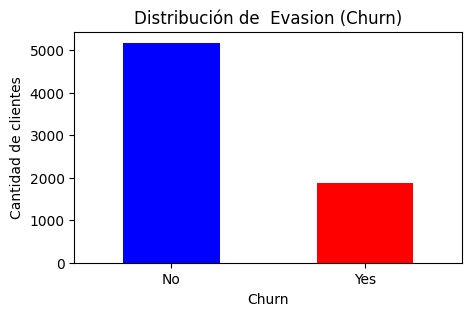

In [30]:
conteo_churn = df["Churn"].value_counts()

plt.figure(figsize=(5,3))
conteo_churn.plot(kind="bar", color=["blue","red"])
plt.title("Distribución de  Evasion (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.show

In [31]:
conteo_churn = df_churn["Churn"].value_counts()
porcentaje_churn = df_churn["Churn"].value_counts(normalize=True) * 100


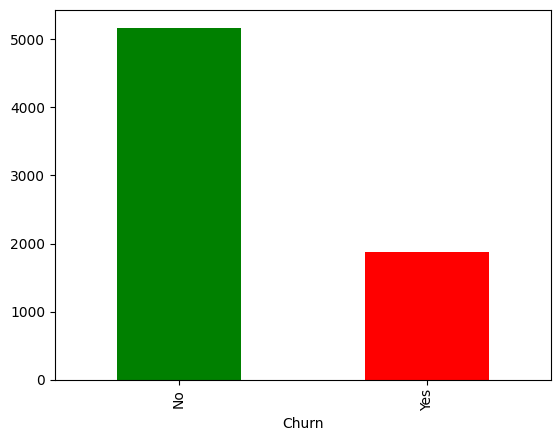

In [32]:
import matplotlib.pyplot as plt

plt.figure()
ax = conteo_churn.plot(
    kind="bar",
    color=["green", "red"]
)


In [33]:
for i, valor in enumerate(conteo_churn):
    porcentaje = porcentaje_churn[i]
    ax.text(
        valor + 50,              # posición en X (un poco a la derecha)
        i,                        # posición en Y (barra actual)
        f"{porcentaje:.1f}%",    # texto con 1 decimal
        va="center"
    )


/tmp/ipython-input-2616360409.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentaje = porcentaje_churn[i]


In [34]:
conteo_churn = df_churn["Churn"].value_counts()
porcentaje_churn = df_churn["Churn"].value_counts(normalize=True) * 100


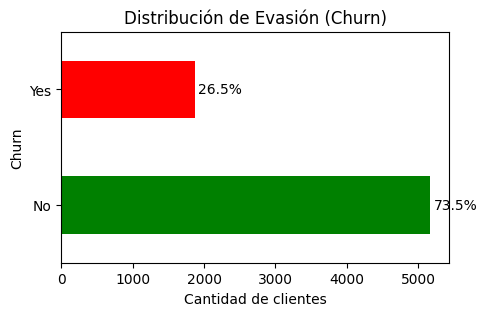

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
ax = conteo_churn.plot(
    kind="barh",
    color=["green", "red"]
)

plt.title("Distribución de Evasión (Churn)")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Churn")

for i, valor in enumerate(conteo_churn):
    porcentaje = porcentaje_churn.iloc[i]
    ax.text(valor + 50, i, f"{porcentaje:.1f}%", va="center")

plt.show()



#Distribución de evasión (Churn)
La visualización muestra que aproximadamente el 73% de los clientes permanece en la empresa, mientras que cerca del 27% abandona el servicio. Aunque la mayoría de los clientes se mantiene, la proporción de churn es significativa, lo que evidencia un problema relevante de rotación y justifica el análisis de los factores asociados a la evasión.

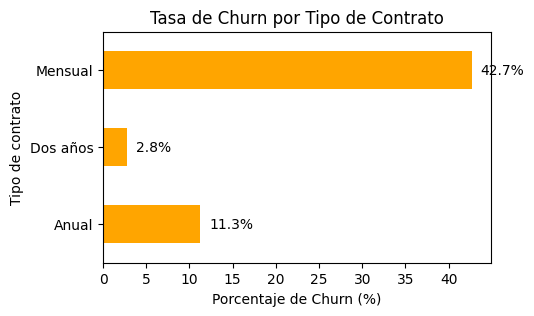

In [36]:
churn_contrato = (
    df_churn.groupby("tipo_contrato")["churn_binario"]
    .mean() * 100
)
plt.figure(figsize=(5,3))
ax = churn_contrato.plot(kind="barh", color="orange")
plt.title("Tasa de Churn por Tipo de Contrato")
plt.xlabel("Porcentaje de Churn (%)")
plt.ylabel("Tipo de contrato")
for i, valor in enumerate(churn_contrato):
    ax.text(valor + 1, i, f"{valor:.1f}%", va="center")

plt.show()


In [37]:
churn_metodo_pago = (
    df_churn.groupby("metodo_pago")["churn_binario"]
    .mean() * 100
).sort_values(ascending=False)

churn_metodo_pago


,churn_binario
metodo_pago,
Cheque electrónico,45.285412
Cheque por correo,19.1067
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101


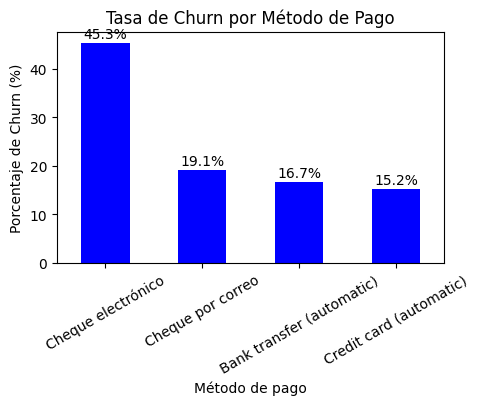

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
ax = churn_metodo_pago.plot(
    kind="bar",
    color="blue"
)

plt.title("Tasa de Churn por Método de Pago")
plt.xlabel("Método de pago")
plt.ylabel("Porcentaje de Churn (%)")
plt.xticks(rotation=30)

# agregar porcentaje encima de cada barra
for i, valor in enumerate(churn_metodo_pago):
    ax.text(i, valor + 1, f"{valor:.1f}%", ha="center")

plt.show()


In [42]:
import pandas as pd

df = pd.read_csv("telecomx_datos_limpios.csv")
df.head()


,id_cliente,Churn,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,Anual,Yes,Cheque por correo,65.6,593.3
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Mensual,No,Cheque por correo,59.9,542.4
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fibra Óptica,...,No,Yes,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fibra Óptica,...,Yes,Yes,No,Yes,Yes,Mensual,Yes,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fibra Óptica,...,No,No,Yes,Yes,No,Mensual,Yes,Cheque por correo,83.9,267.4


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   Churn                   7043 non-null   object 
 2   genero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   antiguedad_meses        7267 non-null   int64  
 7   servicio_telefono       7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  streaming_tv            7267 non-null   

In [44]:
df.describe()


,adulto_mayor,antiguedad_meses,cargo_mensual
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


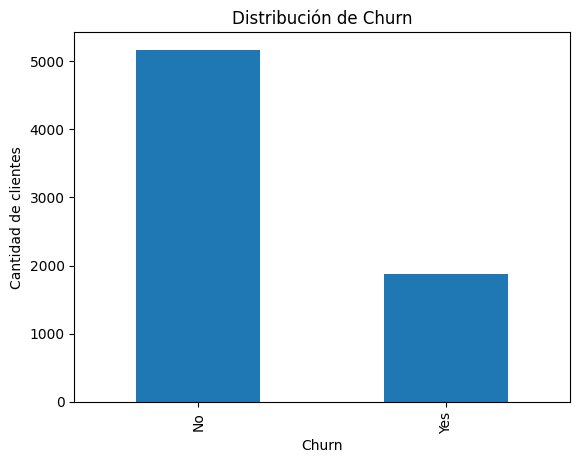

In [45]:
import matplotlib.pyplot as plt

conteo_churn = df["Churn"].value_counts()

plt.figure()
conteo_churn.plot(kind="bar")
plt.title("Distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()


La mayoría de clientes no cancela, pero existe un porcentaje significativo de churn que justifica el análisis.

<Figure size 640x480 with 0 Axes>

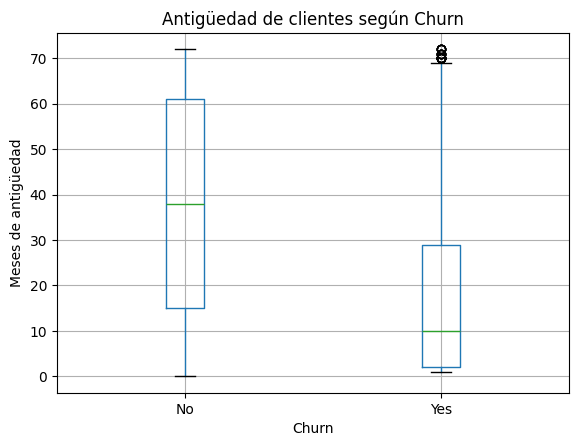

In [46]:
plt.figure()
df.boxplot(column="antiguedad_meses", by="Churn")
plt.title("Antigüedad de clientes según Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Meses de antigüedad")
plt.show()


Los clientes que cancelan presentan menor antigüedad, lo que sugiere que el churn ocurre principalmente en las primeras etapas.

<Figure size 640x480 with 0 Axes>

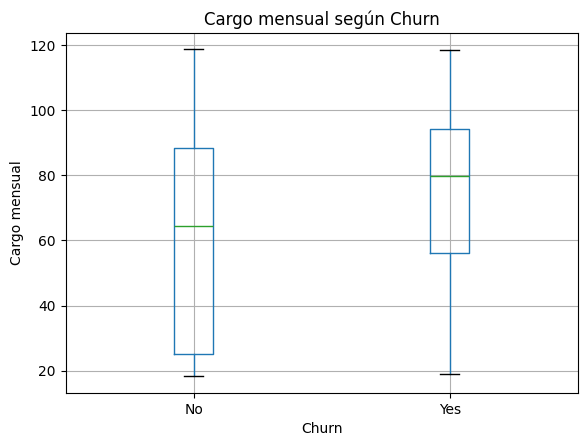

In [47]:
plt.figure()
df.boxplot(column="cargo_mensual", by="Churn")
plt.title("Cargo mensual según Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Cargo mensual")
plt.show()


Los clientes con cargos mensuales más altos tienden a cancelar con mayor frecuencia.

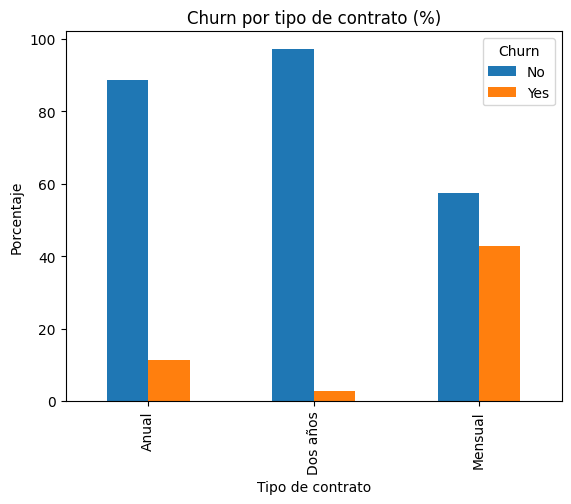

In [48]:
tabla_contrato = pd.crosstab(df["tipo_contrato"], df["Churn"], normalize="index") * 100

tabla_contrato.plot(kind="bar")
plt.title("Churn por tipo de contrato (%)")
plt.xlabel("Tipo de contrato")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


Los contratos mensuales presentan mayor tasa de churn frente a contratos anuales.

El análisis exploratorio evidencia que la evasión de clientes se concentra principalmente en usuarios con baja antigüedad y mayores cargos mensuales. Asimismo, los contratos de corto plazo presentan un porcentaje significativamente mayor de cancelaciones, lo que indica oportunidades claras para estrategias de retención temprana.

¿Qué proporción de clientes se queda y qué proporción se va?

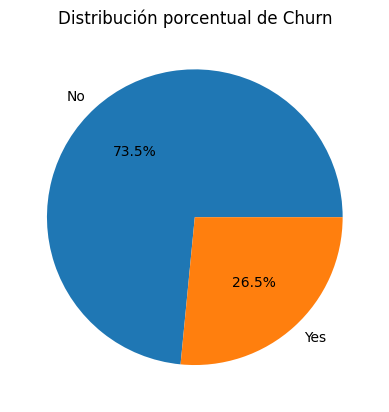

In [51]:
plt.figure()
df["Churn"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribución porcentual de Churn")
plt.ylabel("")
plt.show()


El análisis de la distribución de la evasión muestra que la mayoría de los clientes permanecen en la empresa; sin embargo, existe un porcentaje significativo de clientes que cancelan el servicio, lo cual justifica la necesidad de identificar los factores que influyen en la evasión.

¿En qué perfiles de clientes hay más evasión (churn)?

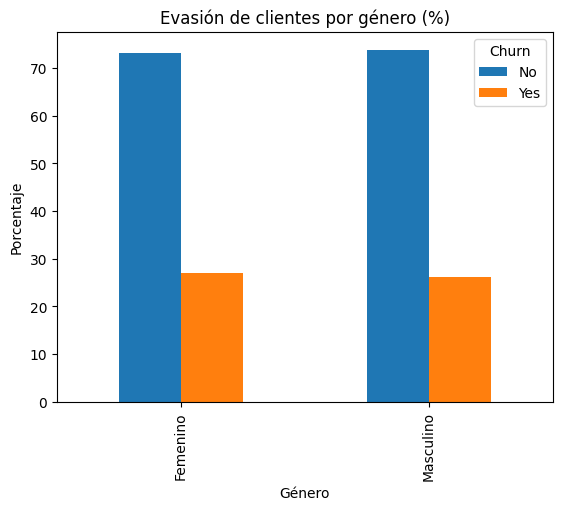

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

tabla_genero = pd.crosstab(df["genero"], df["Churn"], normalize="index") * 100

tabla_genero.plot(kind="bar")
plt.title("Evasión de clientes por género (%)")
plt.xlabel("Género")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


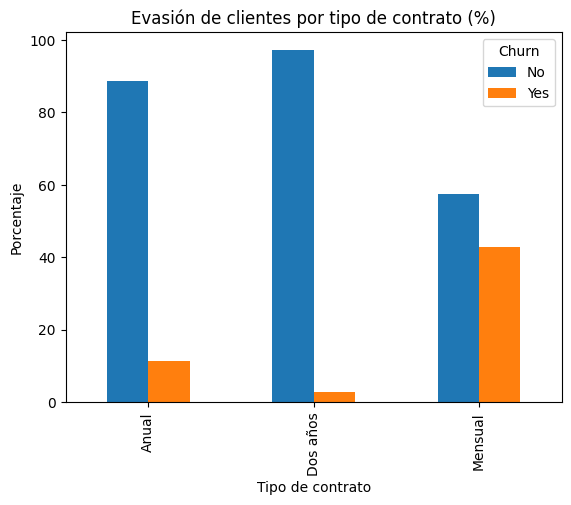

In [53]:
tabla_contrato = pd.crosstab(df["tipo_contrato"], df["Churn"], normalize="index") * 100

tabla_contrato.plot(kind="bar")
plt.title("Evasión de clientes por tipo de contrato (%)")
plt.xlabel("Tipo de contrato")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


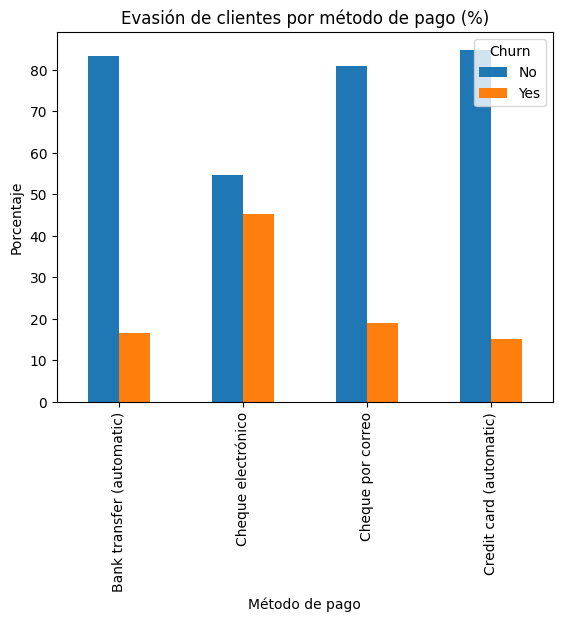

In [54]:
tabla_pago = pd.crosstab(df["metodo_pago"], df["Churn"], normalize="index") * 100

tabla_pago.plot(kind="bar")
plt.title("Evasión de clientes por método de pago (%)")
plt.xlabel("Método de pago")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


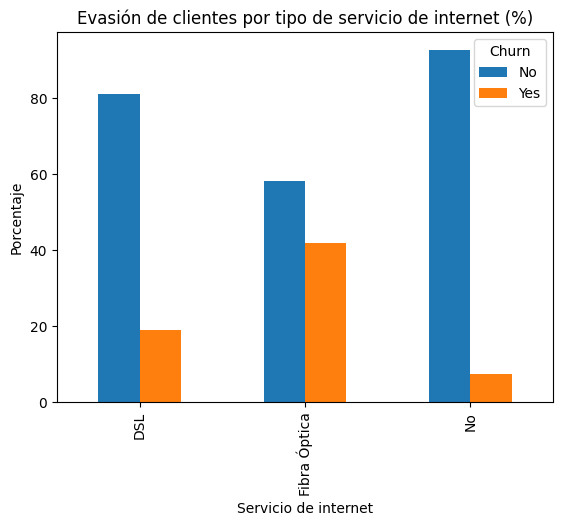

In [55]:
tabla_internet = pd.crosstab(df["servicio_internet"], df["Churn"], normalize="index") * 100

tabla_internet.plot(kind="bar")
plt.title("Evasión de clientes por tipo de servicio de internet (%)")
plt.xlabel("Servicio de internet")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


El análisis por variables categóricas muestra que la evasión de clientes varía significativamente según el perfil. Los clientes con contratos de corto plazo y ciertos métodos de pago presentan mayores tasas de cancelación, lo que representa oportunidades claras para implementar estrategias de retención focalizadas.

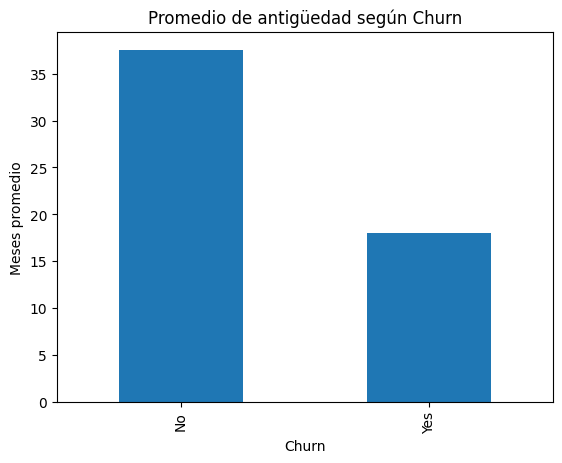

In [56]:
import matplotlib.pyplot as plt

promedio_antiguedad = df.groupby("Churn")["antiguedad_meses"].mean()

plt.figure()
promedio_antiguedad.plot(kind="bar")
plt.title("Promedio de antigüedad según Churn")
plt.xlabel("Churn")
plt.ylabel("Meses promedio")
plt.show()


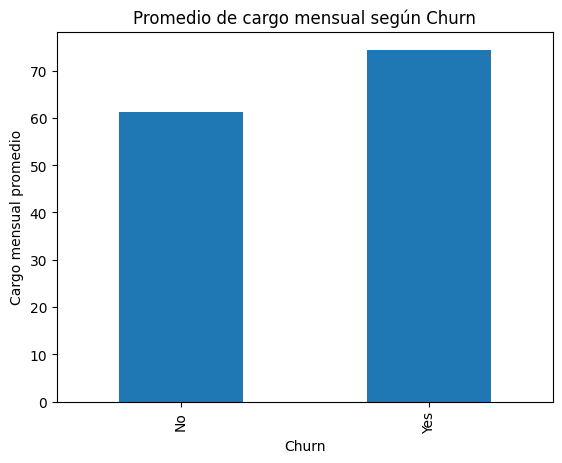

In [57]:
promedio_cargo = df.groupby("Churn")["cargo_mensual"].mean()

plt.figure()
promedio_cargo.plot(kind="bar")
plt.title("Promedio de cargo mensual según Churn")
plt.xlabel("Churn")
plt.ylabel("Cargo mensual promedio")
plt.show()


Los clientes con mayor cargo mensual presentan mayor tendencia a cancelar el servicio.

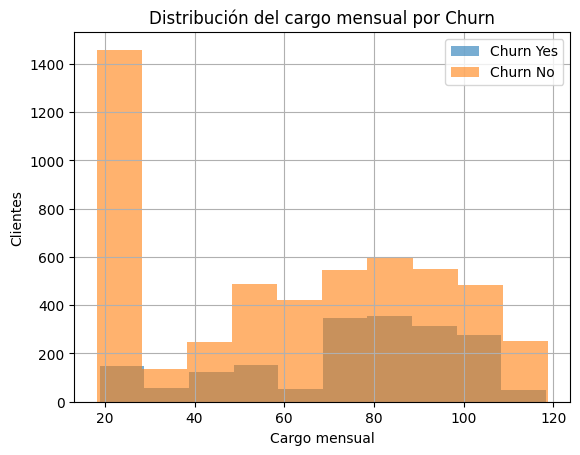

In [62]:
plt.figure()
df[df["Churn"] == "Yes"]["cargo_mensual"].hist(alpha=0.6)
df[df["Churn"] == "No"]["cargo_mensual"].hist(alpha=0.6)
plt.legend(["Churn Yes", "Churn No"])
plt.title("Distribución del cargo mensual por Churn")
plt.xlabel("Cargo mensual")
plt.ylabel("Clientes")
plt.show()


El análisis de variables numéricas muestra que la evasión de clientes se asocia principalmente con una menor antigüedad y cargos mensuales relativamente más altos. Estos resultados sugieren que el churn ocurre con mayor frecuencia en las primeras etapas del servicio y en clientes con mayor carga económica mensual.

# Informe Final  
## Análisis de Evasión de Clientes (Churn) – Telecom X


## 1. Introducción

Telecom X enfrenta una problemática de evasión de clientes (churn), la cual impacta directamente en los ingresos y la estabilidad del negocio.  
El objetivo de este análisis es explorar los datos de clientes para identificar patrones y factores asociados a la cancelación del servicio, utilizando técnicas de análisis descriptivo y análisis exploratorio de datos (EDA).


## 2. Limpieza y Tratamiento de Datos

Para el desarrollo del análisis se realizaron las siguientes acciones:

- Importación del dataset `telecomx_datos_limpios.csv` utilizando la librería Pandas.
- Revisión de la estructura de los datos mediante `info()` y `describe()`.
- Verificación de valores nulos y tipos de datos.
- Identificación de variables categóricas y numéricas relevantes para el análisis del churn.

El conjunto de datos se encontraba previamente limpio, lo que permitió avanzar directamente al análisis exploratorio.


## 3. Análisis Exploratorio de Datos (EDA)

Durante el análisis exploratorio se estudiaron tanto variables categóricas como numéricas.

### Distribución de la evasión
Se analizó la proporción de clientes que permanecen frente a los que cancelan el servicio, observando que existe un porcentaje significativo de evasión que requiere atención estratégica.

### Variables categóricas
El análisis mostró que:
- Los clientes con contratos mensuales presentan mayores tasas de churn.
- Algunos métodos de pago concentran mayor evasión.
- La ausencia de servicios adicionales como soporte técnico o seguridad online se asocia con mayor cancelación.

### Variables numéricas
Se observó que:
- Los clientes que cancelan tienen una menor antigüedad promedio.
- Los cargos mensuales más altos están asociados a una mayor probabilidad de evasión.

Estos patrones evidencian que el churn ocurre principalmente en las primeras etapas del servicio.


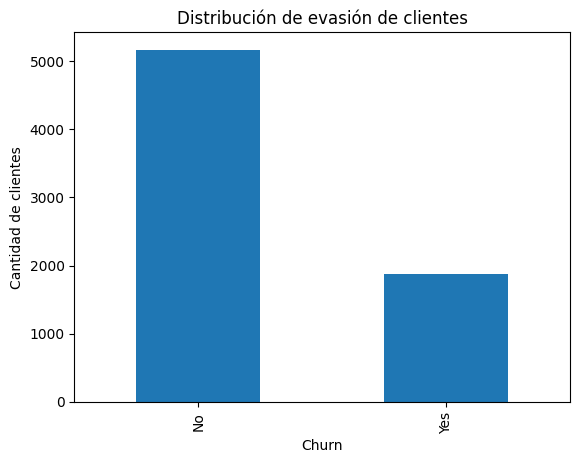

In [66]:
import matplotlib.pyplot as plt

conteo_churn = df["Churn"].value_counts()

plt.figure()
conteo_churn.plot(kind="bar")
plt.title("Distribución de evasión de clientes")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()


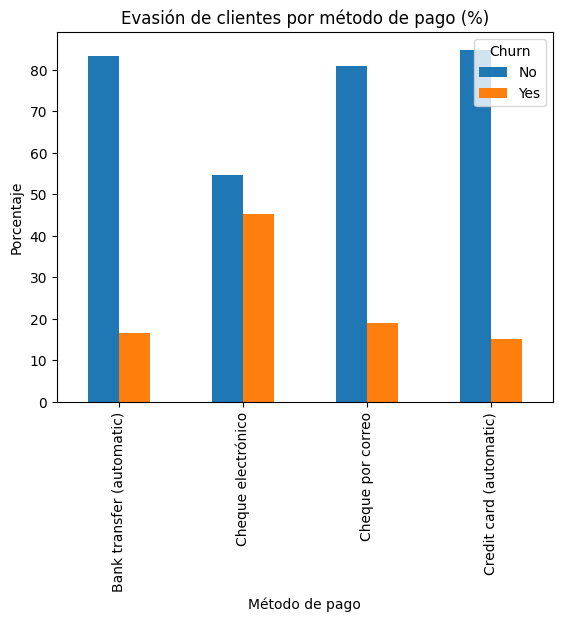

In [67]:
tabla_pago = pd.crosstab(df["metodo_pago"], df["Churn"], normalize="index") * 100

tabla_pago.plot(kind="bar")
plt.title("Evasión de clientes por método de pago (%)")
plt.xlabel("Método de pago")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


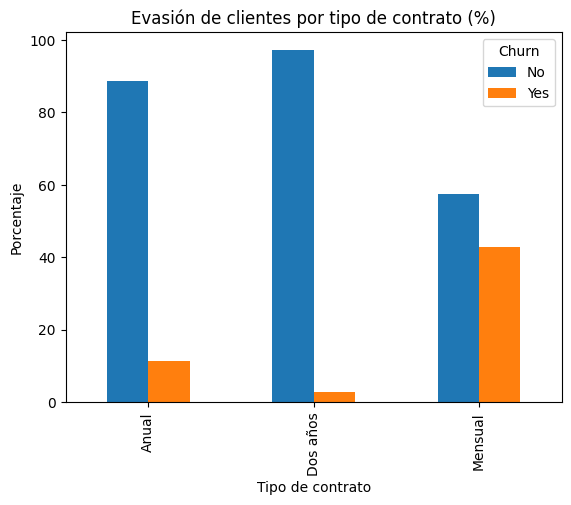

In [68]:
tabla_contrato = pd.crosstab(df["tipo_contrato"], df["Churn"], normalize="index") * 100

tabla_contrato.plot(kind="bar")
plt.title("Evasión de clientes por tipo de contrato (%)")
plt.xlabel("Tipo de contrato")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()


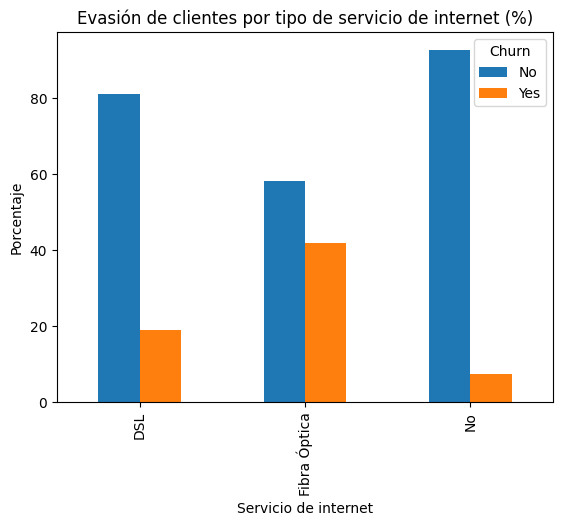

In [69]:
tabla_internet = pd.crosstab(df["servicio_internet"], df["Churn"], normalize="index") * 100

tabla_internet.plot(kind="bar")
plt.title("Evasión de clientes por tipo de servicio de internet (%)")
plt.xlabel("Servicio de internet")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()

## 4. Conclusiones e Insights

- La evasión de clientes se concentra principalmente en los primeros meses de contrato.
- Los contratos de corto plazo presentan mayor riesgo de cancelación.
- Los clientes con cargos mensuales elevados muestran una mayor propensión al churn.
- Los servicios adicionales juegan un rol importante en la retención de clientes.

Estos insights permiten comprender que la evasión no ocurre de forma aleatoria, sino que responde a patrones claros de comportamiento.


## 5. Recomendaciones

A partir del análisis realizado, se proponen las siguientes recomendaciones:

- Implementar estrategias de retención temprana para nuevos clientes.
- Incentivar contratos de mayor duración mediante beneficios comerciales.
- Evaluar la estructura de precios para clientes con cargos mensuales elevados.
- Promover servicios adicionales que aporten valor al cliente.
- Utilizar estos resultados como base para el desarrollo de modelos predictivos de churn.
